In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
trainData = pd.read_csv('../data/train.csv')
testData = pd.read_csv('../data/test.csv')
addData = pd.read_csv('../data/addData.csv')

trainData.drop('id', axis = 1, inplace = True)
trainData = pd.concat([trainData, addData], axis = 0)

In [3]:
trainData.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [4]:
testData.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067


In [5]:
trainData.describe().drop('count')

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
mean,0.631880,-8.380714,0.074701,0.263394,0.118214,0.178798,0.554971,241899.351148,0.500912,119.033103
std,0.157582,4.619296,0.050205,0.223561,0.132670,0.118700,0.225995,59554.635985,0.289920,26.470721
min,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,0.514538,-11.555531,0.023500,0.069344,0.000001,0.077599,0.403470,206940.174200,0.254867,101.053280
50%,0.634288,-8.252399,0.066545,0.242689,0.074427,0.166575,0.564293,243623.139800,0.511800,118.747660
75%,0.739069,-4.911769,0.107757,0.397750,0.204909,0.269935,0.716385,281896.422800,0.746133,136.686590
max,0.975000,-1.357000,0.346387,0.995000,0.890385,0.803157,0.978000,519650.691100,1.000000,206.037000


In [6]:
testData.describe().drop('count')

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
mean,611524.500000,0.632591,-8.377495,0.074475,0.262903,0.117407,0.178317,0.555861,241753.736419,0.500545
std,50438.041204,0.157229,4.622288,0.050024,0.222899,0.131628,0.118165,0.226218,59103.896616,0.290550
min,524164.000000,0.140859,-27.442731,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067
25%,567844.250000,0.514918,-11.550095,0.023500,0.069448,0.000001,0.077821,0.403788,207518.151300,0.253817
50%,611524.500000,0.634556,-8.253186,0.066432,0.242412,0.073968,0.165956,0.566015,243584.585400,0.511867
75%,655204.750000,0.739179,-4.903740,0.107302,0.396870,0.202977,0.268133,0.716694,281737.445300,0.746133
max,698885.000000,0.975000,-1.357000,0.258857,0.995000,0.680914,0.599544,0.978000,449288.808400,0.999867


In [7]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538797 entries, 0 to 14632
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                538797 non-null  float64
 1   AudioLoudness              538797 non-null  float64
 2   VocalContent               538797 non-null  float64
 3   AcousticQuality            538797 non-null  float64
 4   InstrumentalScore          538797 non-null  float64
 5   LivePerformanceLikelihood  538797 non-null  float64
 6   MoodScore                  538797 non-null  float64
 7   TrackDurationMs            538797 non-null  float64
 8   Energy                     538797 non-null  float64
 9   BeatsPerMinute             538797 non-null  float64
dtypes: float64(10)
memory usage: 45.2 MB


In [8]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         174722 non-null  int64  
 1   RhythmScore                174722 non-null  float64
 2   AudioLoudness              174722 non-null  float64
 3   VocalContent               174722 non-null  float64
 4   AcousticQuality            174722 non-null  float64
 5   InstrumentalScore          174722 non-null  float64
 6   LivePerformanceLikelihood  174722 non-null  float64
 7   MoodScore                  174722 non-null  float64
 8   TrackDurationMs            174722 non-null  float64
 9   Energy                     174722 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 13.3 MB


In [9]:
print('Train data ->', trainData.shape)
print('Test data ->', testData.shape)

Train data -> (538797, 10)
Test data -> (174722, 10)


## 1. `Data Preprocessing`

In [10]:
# handle nulls
print('nulls in train ->', trainData.isnull().sum().sum())
print('nulls in test ->', testData.isnull().sum().sum())

nulls in train -> 0
nulls in test -> 0


In [11]:
# handle duplicates
print('duplicates in train ->', trainData.duplicated().sum())
print('duplicates in test ->', testData.duplicated().sum())

duplicates in train -> 0
duplicates in test -> 0


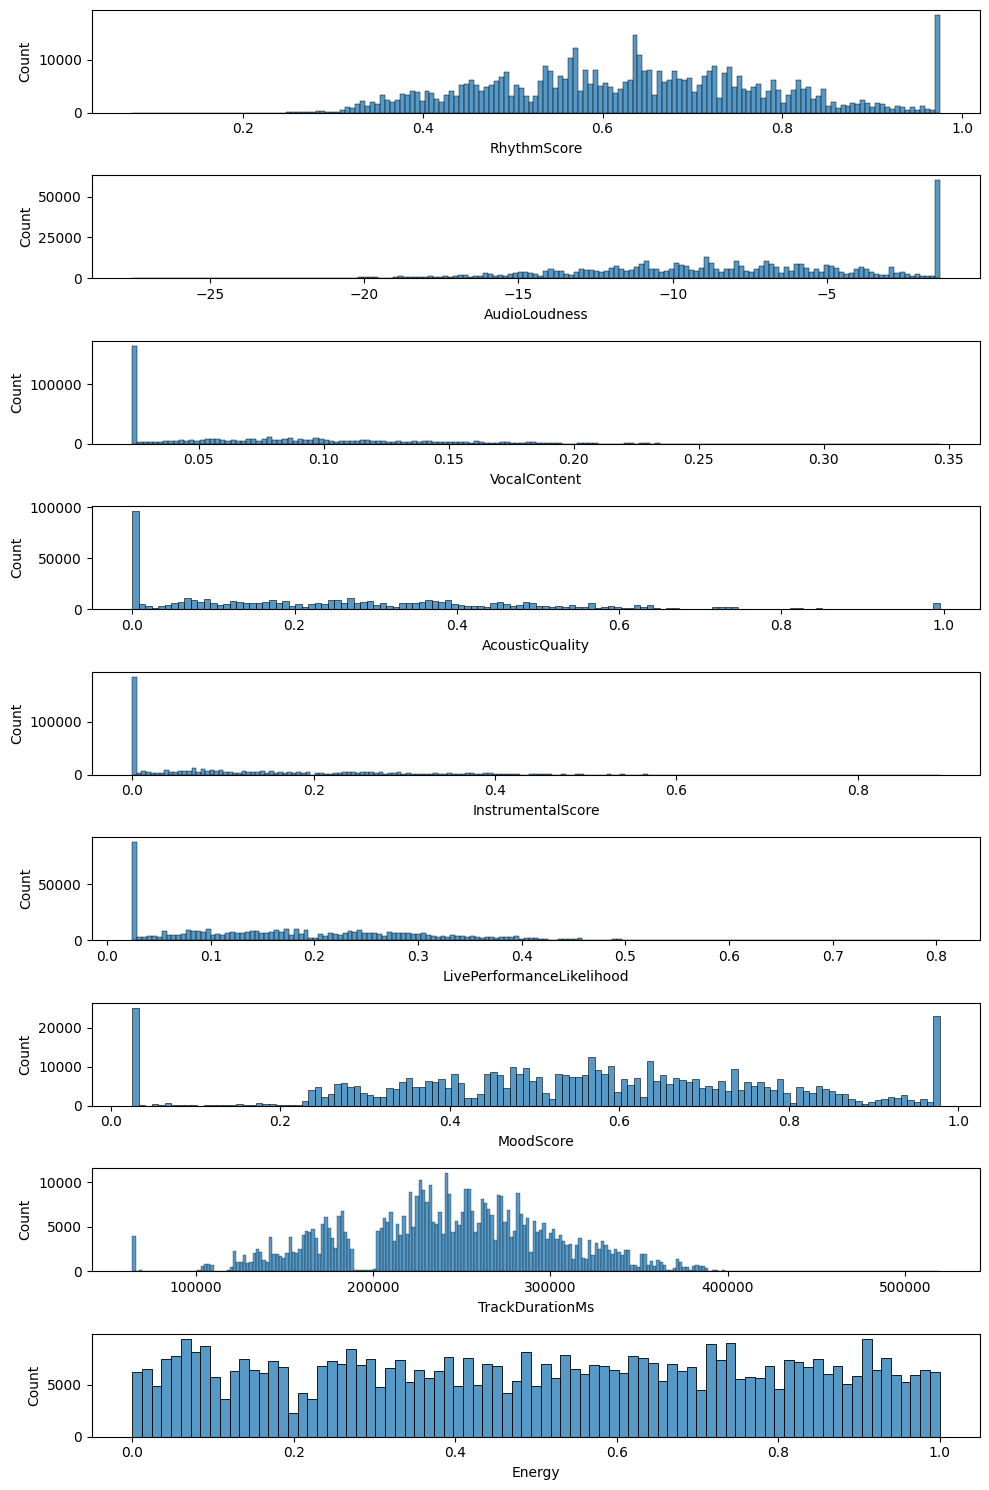

In [12]:
# handle outliers
# 1. plotting outliers

COLUMNS = list(testData.columns)[1:]
fig, ax = plt.subplots(nrows = len(COLUMNS), ncols = 1, figsize = (10,15))
for index, col in enumerate(COLUMNS):
    sns.histplot(x = trainData[col], ax = ax[index])
    
plt.tight_layout()
plt.show()

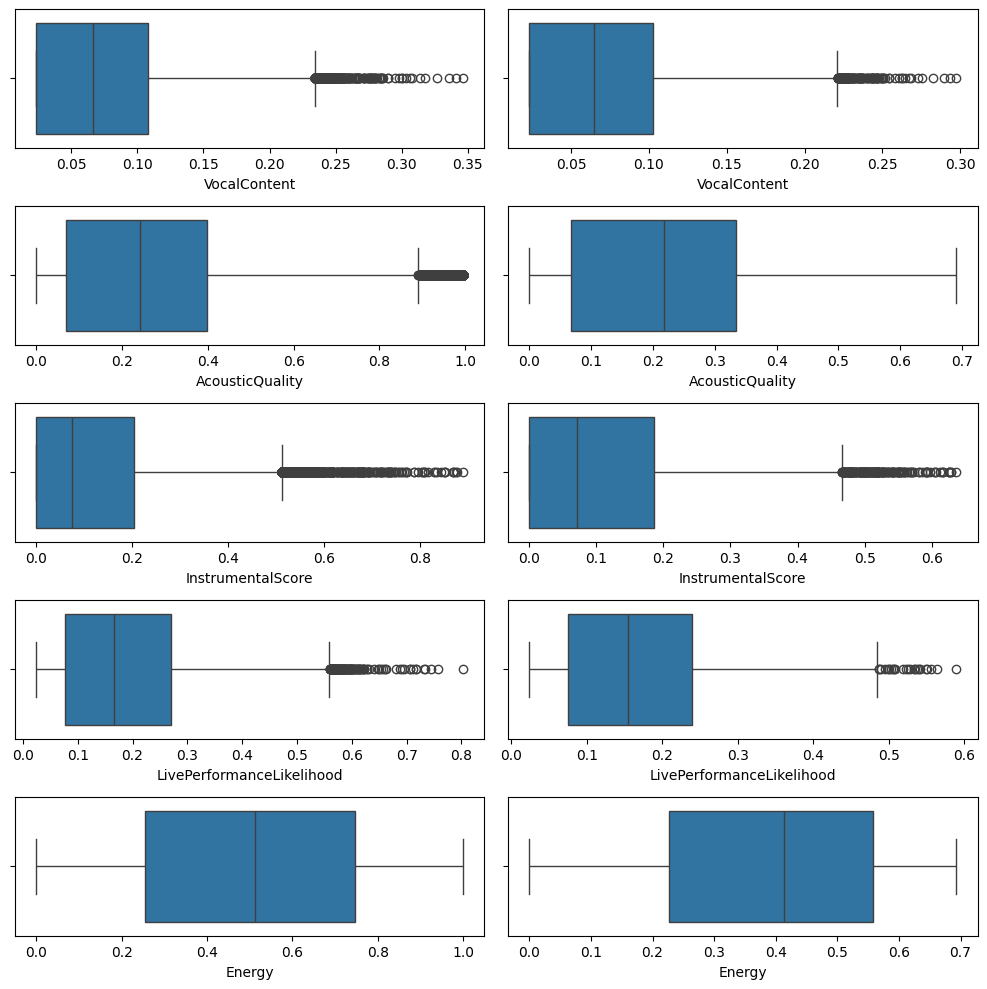

In [13]:
transformCols = ['VocalContent', 'AcousticQuality', 'InstrumentalScore', 'LivePerformanceLikelihood', 'Energy']
fig, ax = plt.subplots(nrows = len(transformCols), ncols = 2, figsize = (10, 10))
for index, col in enumerate(transformCols):
    sns.boxplot(x = trainData[col], ax = ax[index, 0])
    sns.boxplot(x = np.log1p(trainData[col]), ax = ax[index, 1])
    
plt.tight_layout()
plt.show()

In [14]:
# we will transform only the transformCols 
for col in transformCols:
    trainData[col] = np.log1p(trainData[col])
    testData[col] = np.log1p(testData[col])

## 2. `Feature Importances`

In [15]:
trainData.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023228,0.000005,0.000001,0.050109,0.409866,290715.6450,0.602274,147.53020
1,0.639451,-16.267598,0.069078,0.368060,0.299671,0.157450,0.651010,164519.5174,0.135754,136.15963
2,0.514538,-15.953575,0.105004,0.160160,0.374191,0.029147,0.423865,174495.5667,0.485303,55.31989
3,0.734463,-1.357000,0.051610,0.001649,0.148176,0.082838,0.278745,225567.4651,0.397074,147.91212
4,0.532968,-13.056437,0.023228,0.066431,0.000001,0.286190,0.477769,213960.6789,0.666461,89.58511


In [16]:
ss = StandardScaler()

trainData[COLUMNS] = ss.fit_transform(trainData[COLUMNS])
testData[COLUMNS] = ss.transform(testData[COLUMNS])

In [ ]:
# tree based feature importances
tempData = trainData.head(50000)
X = tempData.drop('BeatsPerMinute', axis = 1)
y = tempData['BeatsPerMinute']

rr = RandomForestRegressor(random_state = 0, n_estimators=500)
rr.fit(X, y)

imp = pd.Series(rr.feature_importances_, index=X.columns).sort_values(ascending=False)
print(imp)